In [1]:
import torch
import torch.nn as nn

In [ ]:
!nvidia-smi

Wed Jun 19 13:41:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

download the emoji dataset , the below one has 2750 emoji images

In [2]:
!pip install datasets sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (4

In [3]:
from datasets import load_dataset
dataset = load_dataset("valhalla/emoji-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2749 [00:00<?, ? examples/s]

In [6]:
import numpy as np
import IPython.display


In [ ]:
dataset["train"]

Dataset({
    features: ['image', 'text'],
    num_rows: 2749
})

In [4]:
from torch.utils.data import DataLoader, Dataset
class CustomDataset(Dataset):
    def __init__(self, images, embeddings):
        self.images = images
        self.embeddings = embeddings

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        embedding = self.embeddings[idx]
        return image, embedding


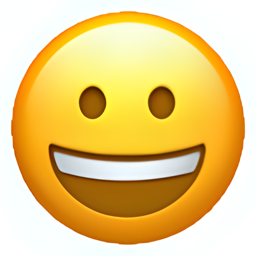

grinning face


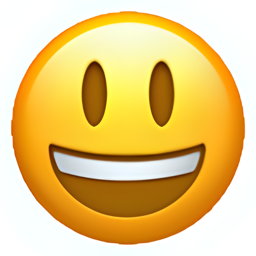

smiling face with open mouth


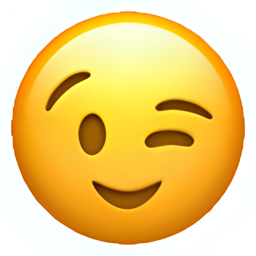

winking face


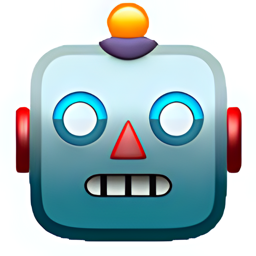

robot face


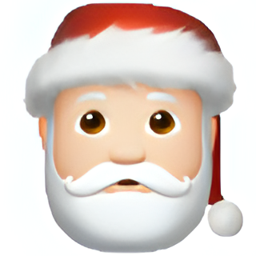

father christmas


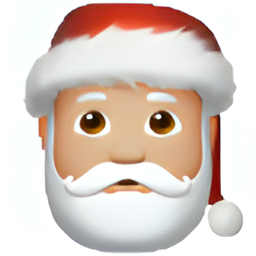

father christmas


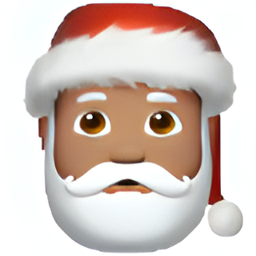

father christmas


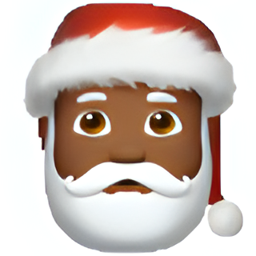

father christmas


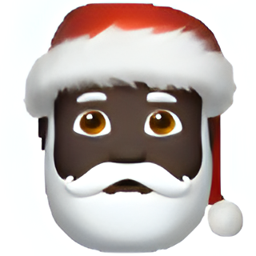

father christmas


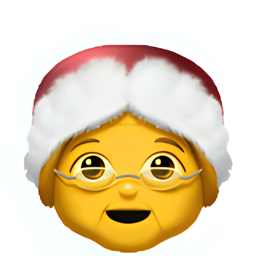

mother christmas


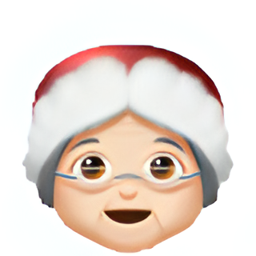

mother christmas


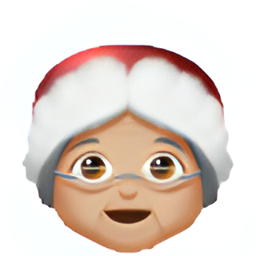

mother christmas


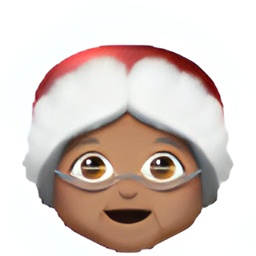

mother christmas


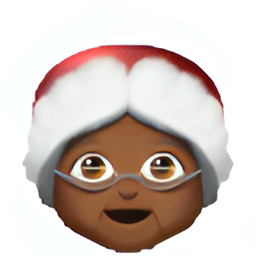

mother christmas


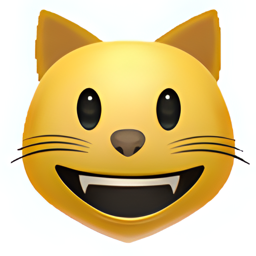

smiling cat face with open mouth


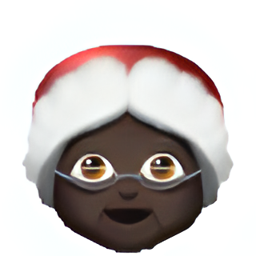

mother christmas


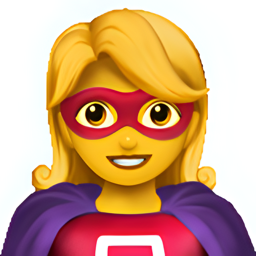

superhero


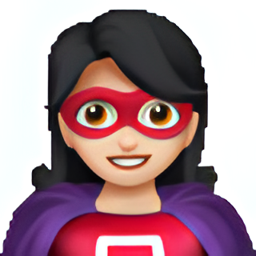

superhero


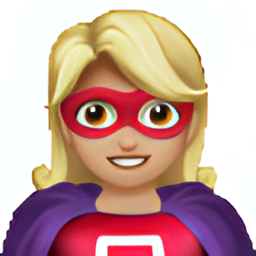

superhero


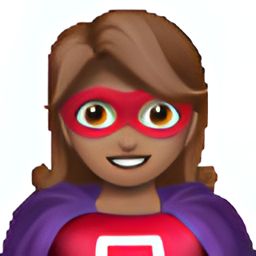

superhero


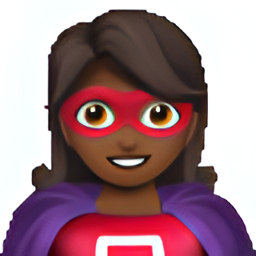

superhero


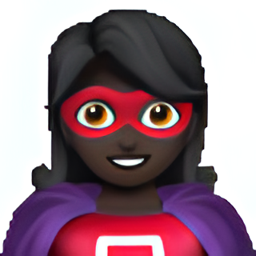

superhero


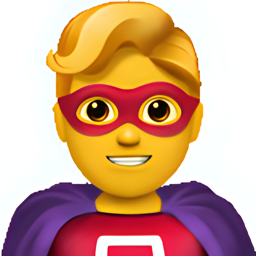

man superhero


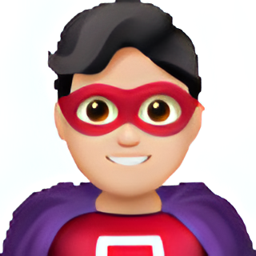

man superhero light skin tone


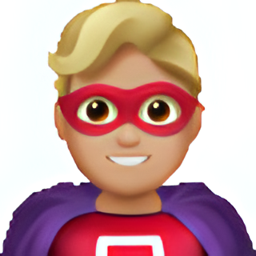

man superhero medium light skin tone


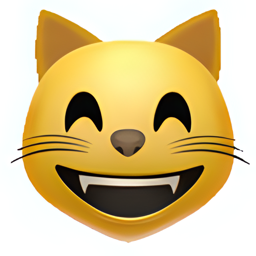

grinning cat face with smiling eyes


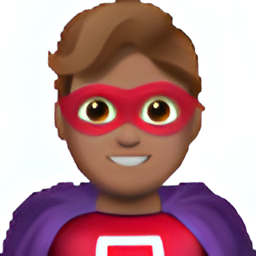

man superhero medium skin tone


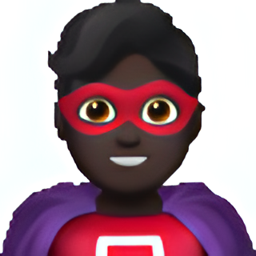

man superhero dark skin tone


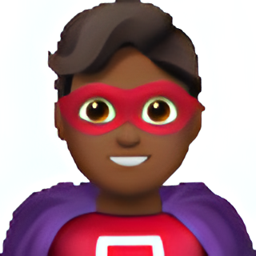

man superhero medium dark skin tone


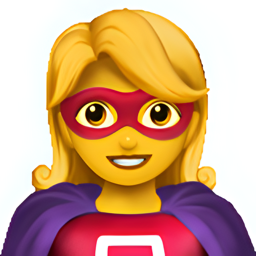

woman superhero


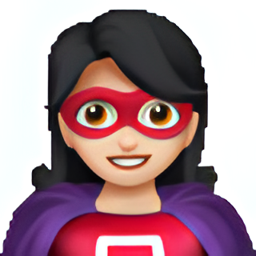

woman superhero light skin tone


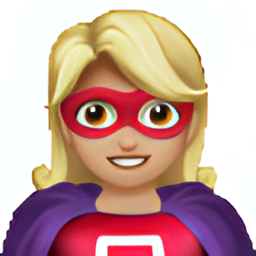

woman superhero medium light skin tone


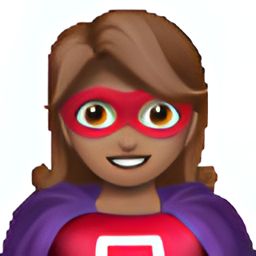

woman superhero medium skin tone


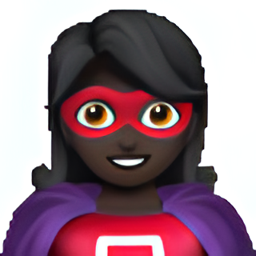

woman superhero dark skin tone


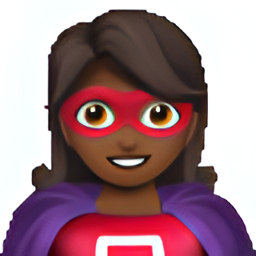

woman superhero medium dark skin tone


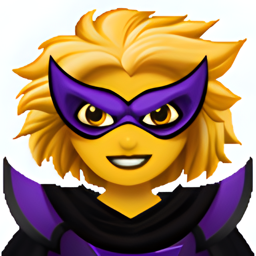

supervillain


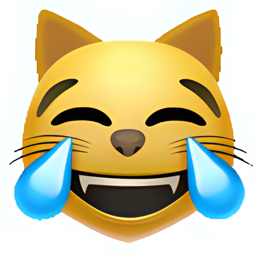

cat face with tears of joy


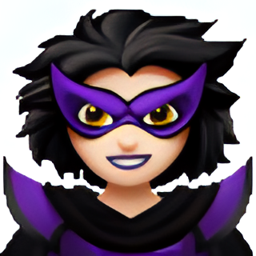

supervillain


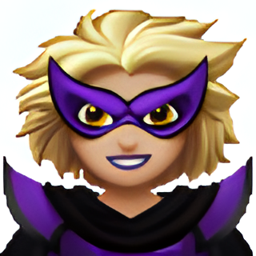

supervillain


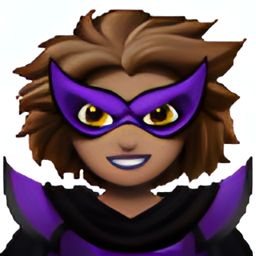

supervillain


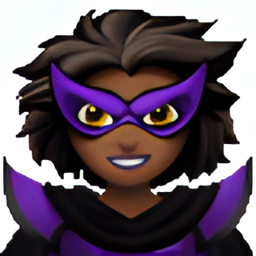

supervillain


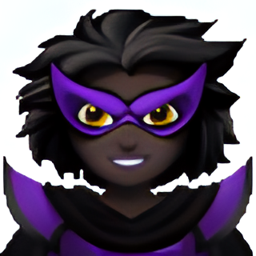

supervillain


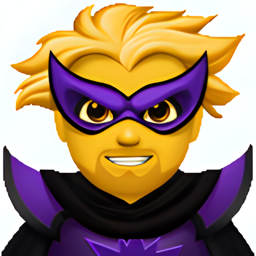

man supervillain


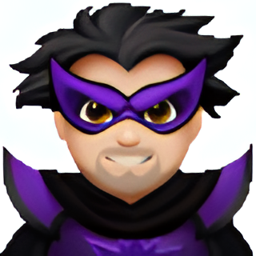

man supervillain light skin tone


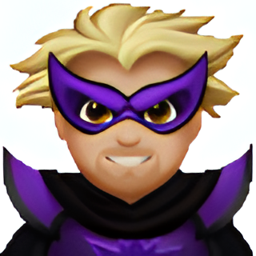

man supervillain medium light skin tone


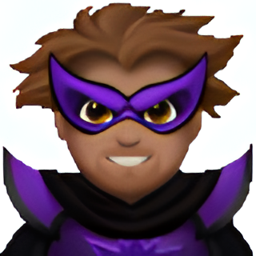

man supervillain medium skin tone


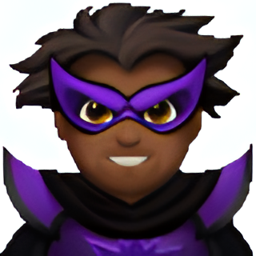

man supervillain medium dark skin tone


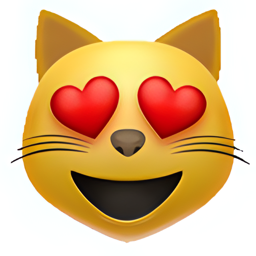

smiling cat face with heart shaped eyes


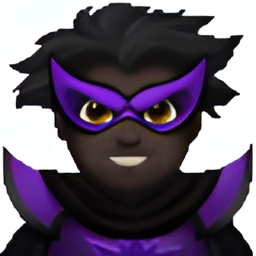

man supervillain dark skin tone


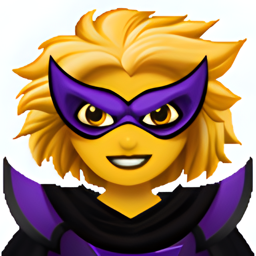

woman supervillain


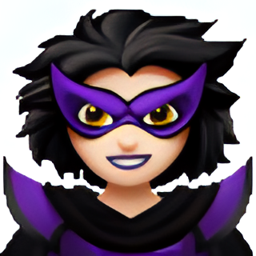

woman supervillain light skin tone


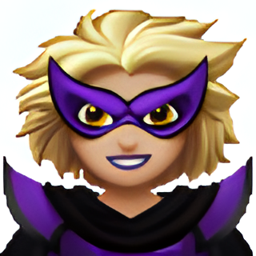

woman supervillain medium light skin tone


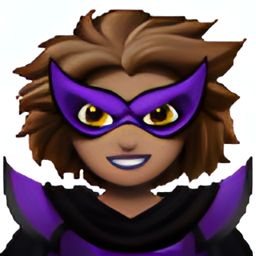

woman supervillain medium skin tone


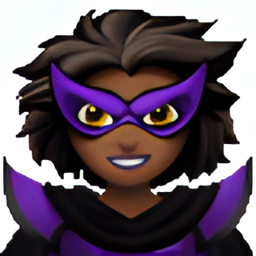

woman supervillain medium dark skin tone


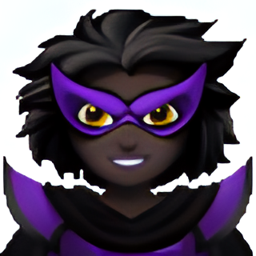

woman supervillain dark skin tone


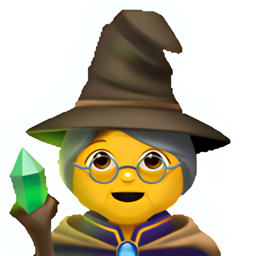

mage


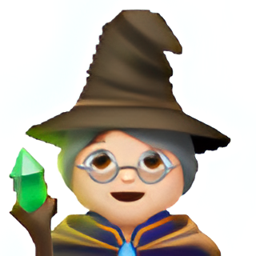

mage


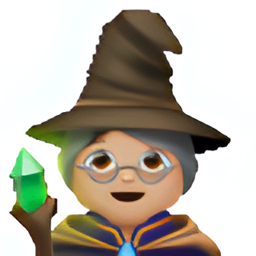

mage


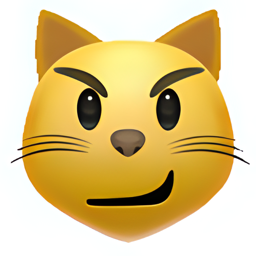

cat face with wry smile


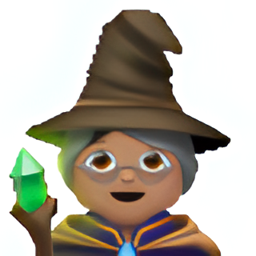

mage


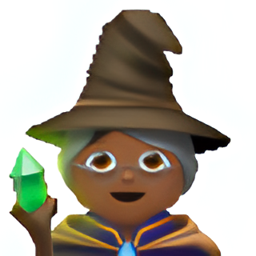

mage


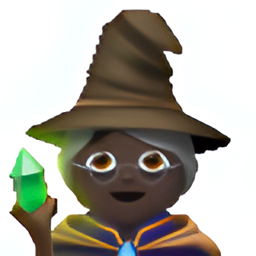

mage


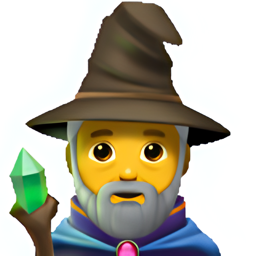

man mage


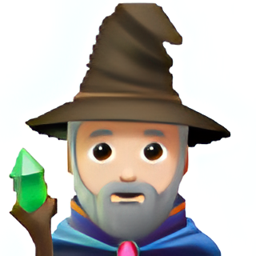

man mage light skin tone


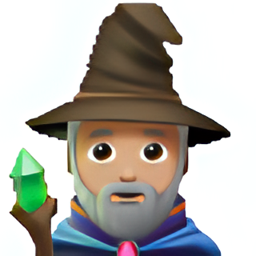

man mage medium light skin tone


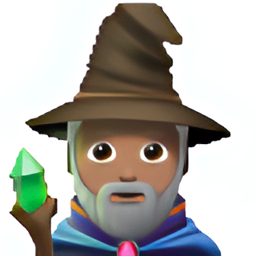

man mage medium skin tone


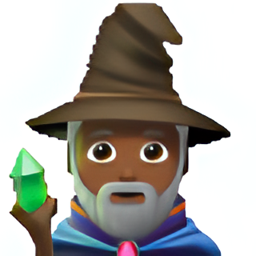

man mage medium dark skin tone


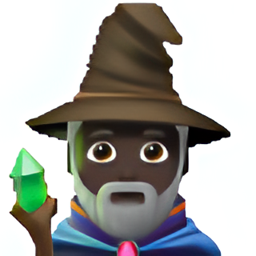

man mage dark skin tone


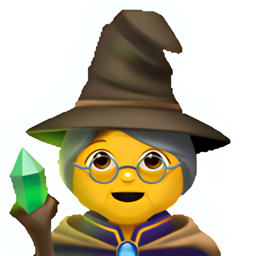

woman mage


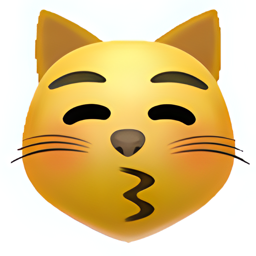

kissing cat face with closed eyes


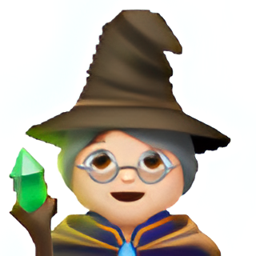

woman mage light skin tone


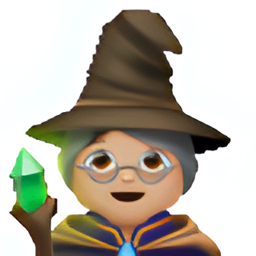

woman mage medium light skin tone


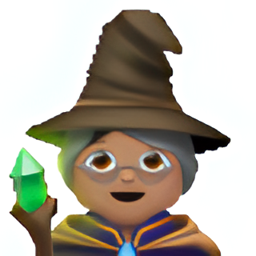

woman mage medium skin tone


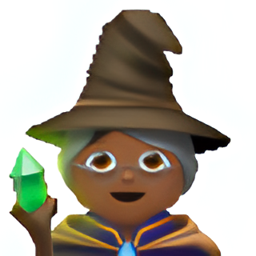

woman mage medium dark skin tone


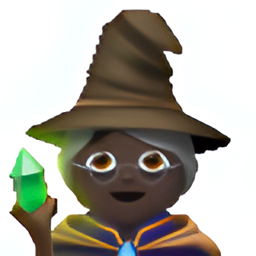

woman mage dark skin tone


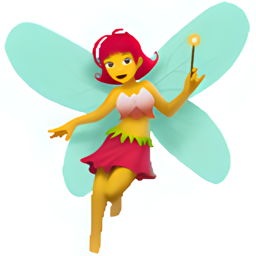

fairy


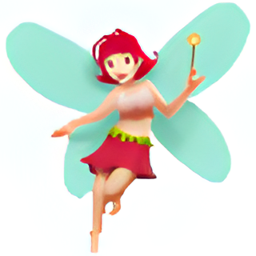

fairy


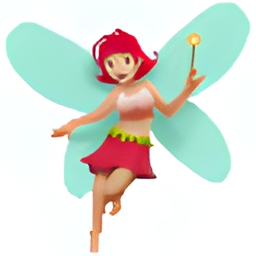

fairy


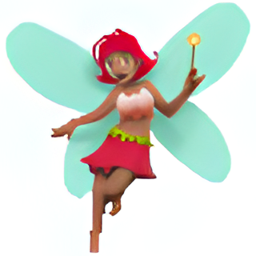

fairy


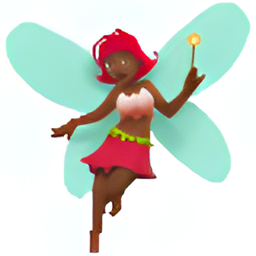

fairy


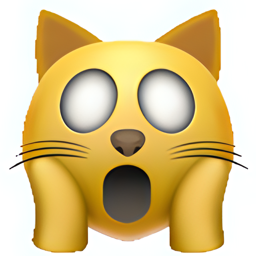

weary cat face


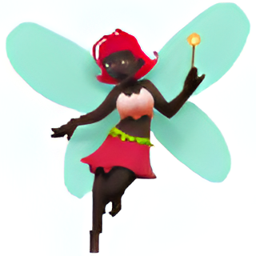

fairy


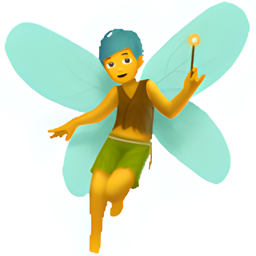

man fairy


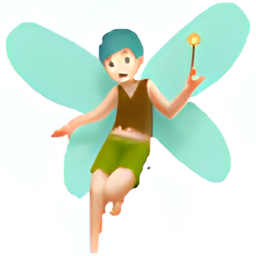

man fairy light skin tone


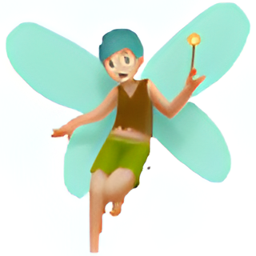

man fairy medium light skin tone


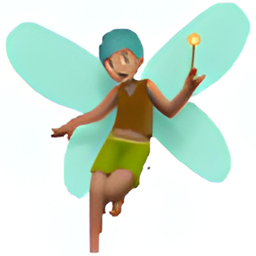

man fairy medium skin tone


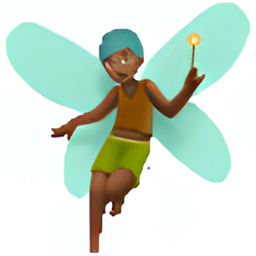

man fairy medium dark skin tone


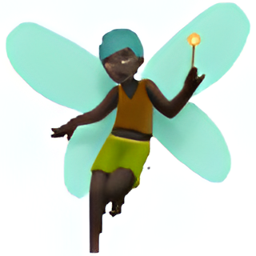

man fairy dark skin tone


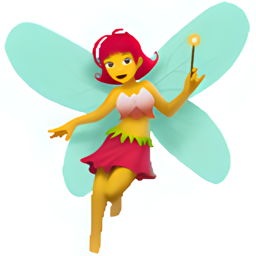

woman fairy


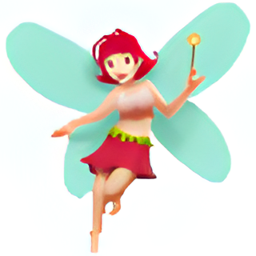

woman fairy light skin tone


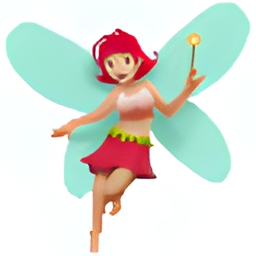

woman fairy medium light skin tone


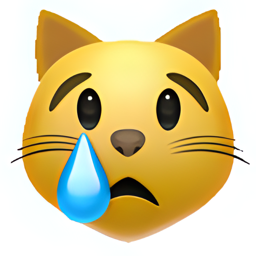

crying cat face


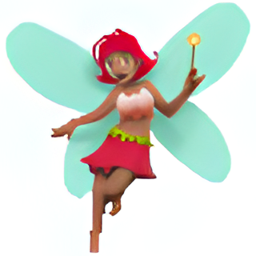

woman fairy medium skin tone


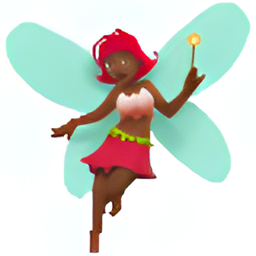

woman fairy medium dark skin tone


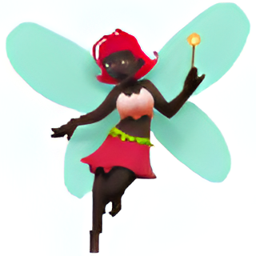

woman fairy dark skin tone


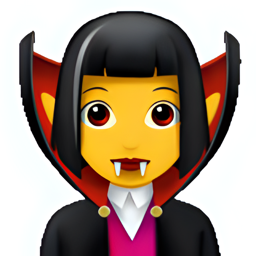

vampire


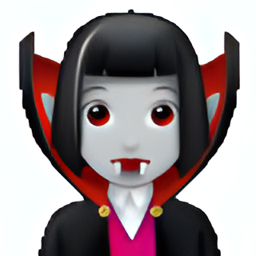

vampire


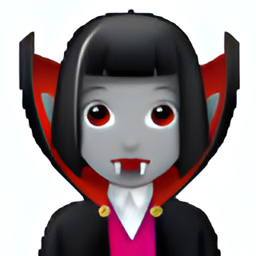

vampire


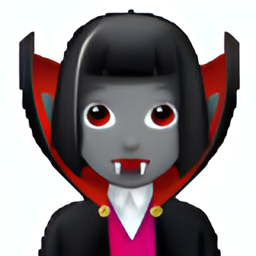

vampire


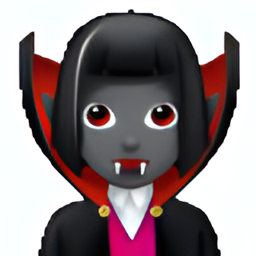

vampire


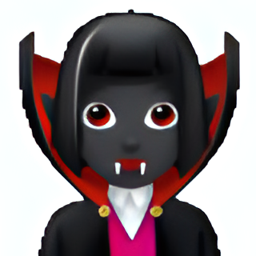

vampire


In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

img_data = torch.empty(0)
emb_data = torch.empty(0)
for indx,i in enumerate(dataset["train"]):
    img_array = np.asarray(i["image"]).astype(np.float32)
    test=torch.from_numpy(img_array/255.0).unsqueeze(0)
    embed=torch.from_numpy(model.encode(i["text"])).unsqueeze(0)
    img_data = torch.cat((img_data, test), dim=0) if img_data.numel() > 0 else test
    emb_data = torch.cat((emb_data, embed), dim=0) if emb_data.numel() > 0 else embed
    IPython.display.display(i["image"])
    print(i["text"])
    # break
    if indx==100:
        break

In [ ]:
img_data.shape

torch.Size([101, 256, 256, 3])

In [ ]:
emb_data.shape

torch.Size([101, 384])

In [8]:
dataset = CustomDataset(img_data, emb_data)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [9]:
class Generator(nn.Module):
    def __init__(self, noise_dim, embedding_dim):
        super(Generator, self).__init__()
        self.noise_dim = noise_dim
        self.embedding_dim = embedding_dim
        self.fc1 = nn.Linear(noise_dim + embedding_dim, 8 * 8 * 512)

        self.gen = nn.Sequential(
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 16x16
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 32x32
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 64x64
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 128x128
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2),  # 256x256
            nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, noise, embedding):
        x = torch.cat((noise, embedding), dim=1)
        x = self.fc1(x)
        x = x.view(-1, 512, 8, 8)
        img = self.gen(x)
        return img
# noise_dim = 100  # Example noise dimension
# embedding_dim = 384  # Example word embedding dimension

# generator = Generator(noise_dim, embedding_dim)

# # Test the generator with random noise and embedding
# noise = torch.randn(1, noise_dim)
# embedding = torch.randn(1, embedding_dim)
# generated_img = generator(noise, embedding)
# print(generated_img.shape)  # Should print torch.Size([1, 3, 256, 256])


In [10]:
class Discriminator(nn.Module):
    def __init__(self,embedding_dim):
        super().__init__()
        self.conv_model = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten()
        )
        self.embed=nn.Sequential(nn.Linear(262144 + embedding_dim, 1024))
        self.fc2 = nn.Linear(1024, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input,sentence_embeding):
        input=input.permute(0, 3, 1, 2)
        conv_out = self.conv_model(input)
        combined = torch.cat((conv_out, sentence_embeding), dim=1)
        x=self.embed(combined)
        x = nn.ReLU()(x)
        y=self.fc2(x)
        return self.sigmoid(y)

In [ ]:
# embedding_dim = 300  # Example word embedding dimension

# discriminator = Discriminator(embedding_dim)


# # Test the discriminator with a random image and embedding
# image =test.unsqueeze(0)
# embedding = torch.randn(1, embedding_dim)
# output = discriminator(image, embedding)
# print(output.shape)  # Should print torch.Size([1, 1])


In [ ]:
# Hyperparameters
import torch.optim as optim
num_epochs = 1000
batch_size = 2
learning_rate = 0.0002
noise_dim = 50
embedding_dim = 384

# Initialize models
generator = Generator(noise_dim, embedding_dim).cuda()
discriminator = Discriminator(embedding_dim).cuda()

print("Generator param count",sum(p.numel() for p in generator.parameters()))
# print("Discriminator param count",sum(p.numel() for p in Discriminator.parameters()))
# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))



# Training loop
for epoch in range(num_epochs):
    for i, (imgs, embeddings) in enumerate(dataloader):

        # Configure input
        real_imgs = imgs.cuda()
        embeddings = embeddings.cuda()
        batch_size = real_imgs.size(0)

        # Adversarial ground truths
        valid = torch.ones(batch_size, 1).cuda()
        fake = torch.zeros(batch_size, 1).cuda()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and concatenate with embeddings
        z = torch.randn(batch_size, noise_dim).cuda()
        gen_imgs = generator(z, embeddings)

        # print("gen images: ", gen_imgs.shape)
        gen_imgs=gen_imgs.permute(0, 2, 3, 1)
        # print("gen images: ", gen_imgs.shape)
        # Loss measures generator's ability to fool the discriminator
        g_loss = criterion(discriminator(gen_imgs, embeddings), valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        real_loss = criterion(discriminator(real_imgs, embeddings), valid)

        # Loss for fake images
        fake_loss = criterion(discriminator(gen_imgs.detach(), embeddings), fake)

        # Total discriminator loss
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # Print progress
        print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] "
              f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


Generator param count 15824131
[Epoch 0/1000] [Batch 0/11] [D loss: 0.6933] [G loss: 0.7063]
[Epoch 0/1000] [Batch 1/11] [D loss: 0.7507] [G loss: 0.3649]
[Epoch 0/1000] [Batch 2/11] [D loss: 0.7367] [G loss: 1.0559]
[Epoch 0/1000] [Batch 3/11] [D loss: 0.7023] [G loss: 0.9070]
[Epoch 0/1000] [Batch 4/11] [D loss: 0.6658] [G loss: 0.7820]
[Epoch 0/1000] [Batch 5/11] [D loss: 0.6365] [G loss: 0.6796]
[Epoch 0/1000] [Batch 6/11] [D loss: 0.6126] [G loss: 1.2032]
[Epoch 0/1000] [Batch 7/11] [D loss: 0.4934] [G loss: 0.8701]
[Epoch 0/1000] [Batch 8/11] [D loss: 1.1319] [G loss: 4.4020]
[Epoch 0/1000] [Batch 9/11] [D loss: 0.9865] [G loss: 0.1559]
[Epoch 0/1000] [Batch 10/11] [D loss: 1.1688] [G loss: 0.1024]
[Epoch 1/1000] [Batch 0/11] [D loss: 0.6497] [G loss: 0.5369]
[Epoch 1/1000] [Batch 1/11] [D loss: 0.6031] [G loss: 0.9783]
[Epoch 1/1000] [Batch 2/11] [D loss: 0.5231] [G loss: 1.3305]
[Epoch 1/1000] [Batch 3/11] [D loss: 0.3929] [G loss: 1.5874]
[Epoch 1/1000] [Batch 4/11] [D loss: 0

In [57]:
noise_dim = 5  # Example noise dimension
embedding_dim = 384  # Example word embedding dimension

embedding=torch.from_numpy(model.encode("man supervillain medium light skin tone")).unsqueeze(0).to("cuda")
# Test the generator with random noise and embedding
noise = torch.randn(1, noise_dim).to('cuda')
# embedding = torch.randn(1, embedding_dim).to('cuda')
generated_img = generator(noise, embedding)
print(generated_img.shape)

torch.Size([1, 3, 256, 256])


In [58]:
generated_img[0].shape

torch.Size([3, 256, 256])

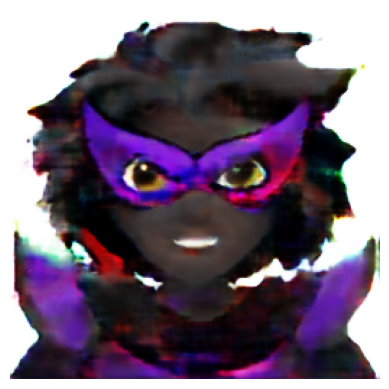

In [59]:

import matplotlib.pyplot as plt


# Assuming your tensor is named 'tensor'
# tensor = ...

# Convert tensor to numpy array
img=generated_img[0].to("cpu")
np_array = img.permute(1, 2, 0).detach().numpy()

# Display the image
plt.imshow(np_array)
plt.axis('off') # Hide axes
plt.show()
